In [ ]:
#importing numpy library
import numpy as np

**Linear Regression**

In [29]:
class Linear_regression:

 #initiating the parameters (learning rate & no of iterations)
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations



  def fit(self,X,Y):

     self.m,self.n=X.shape #no of rows & no of columns excluding target

     #initiating the weights and bias

     self.w = np.zeros(self.n)  #array size should equal to no of features
     self.b = 0
     self.X=X
     self.Y=Y


    #implementing gradient descent
     for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):


    Y_prediction= self.predict(self.X)

    #calculate gradients

    dw= -(2*(self.X.T).dot(self.Y - Y_prediction))/self.m

    db= -2*np.sum(self.Y - Y_prediction)/self.m

    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  def predict(self,X):

    return X.dot(self.w) + self.b


implementing the linear regression model

In [30]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data pre-processing

In [31]:
#loading the data from csv to pandas dataframe
salary_data=pd.read_csv('/content/salary_data.csv')

In [32]:
#printing the first five rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [33]:
#printing the last five rows
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [34]:
#checking no of rows and columns
salary_data.shape

(30, 2)

In [5]:
#checking for null values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


splitting feature and target

In [35]:

X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [36]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [37]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


splitting the data into train and test data

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [39]:
print(X_test)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]
 [6.8]]


In [40]:
print(Y_test)

[ 46205  39343  61111  57189  98273  93940 113812  60150  43525  91738]


In [41]:
print(X_train)

[[ 2.9]
 [ 9.6]
 [ 4. ]
 [ 2.2]
 [ 3.9]
 [ 5.1]
 [10.3]
 [ 9. ]
 [ 5.3]
 [ 1.5]
 [ 3.2]
 [ 9.5]
 [ 8.7]
 [ 5.9]
 [ 4. ]
 [ 7.9]
 [10.5]
 [ 4.1]
 [ 4.9]
 [ 3.2]]


In [42]:
print(Y_train)

[ 56642 112635  56957  39891  63218  66029 122391 105582  83088  37731
  54445 116969 109431  81363  55794 101302 121872  57081  67938  64445]


training the linear regression model

In [43]:
model=Linear_regression(learning_rate=0.02,no_of_iterations=1000)

fittting the values to our model


In [44]:
model.fit(X_train,Y_train)

In [45]:
#printing the parameter values (final weight & bias)
print('weight= ',model.w[0])
print('bias= ',model.b)

weight=  9514.400999035135
bias=  23697.406507136307


Y= 9514(X) + 23697

salary=9514*(experience) + 23697

predict salary values for test data

In [47]:
test_data_prediction=model.predict(X_test)

In [48]:
#printing the predicted values for test data
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


visualising the predicted values and actual values

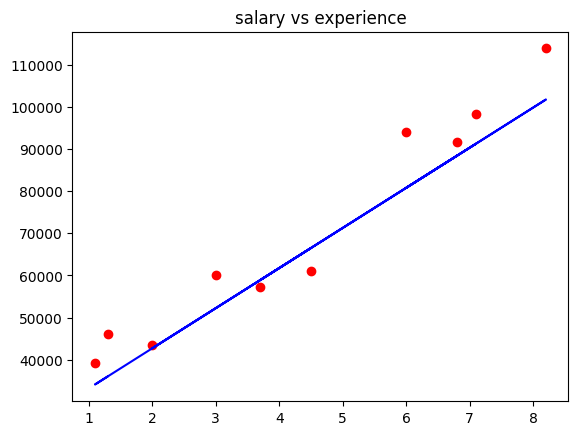

In [50]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel=('experience')
plt.ylabel=('salary')
plt.title('salary vs experience')
plt.show()